# Solución de la armadura

In [1]:
import numpy as np

In [2]:
carga_inicial = 20
diferencial_de_carga = 0.25
carga_final = carga_inicial + 18 * diferencial_de_carga

distancia_AD = 1
distancia_AB = 2
distancia_BC = 2
distancia_AC = distancia_AB + distancia_BC

angulo_barra_inclinada = np.arctan(distancia_AD / distancia_BC)
angulo_barra_inclinada_AE = np.arctan(distancia_AD / distancia_AB)

In [3]:
rango_de_angulos = np.arange(0, 190, 10)
rango_de_cargas = np.arange(carga_inicial, carga_final + diferencial_de_carga, diferencial_de_carga)
rango_de_cargas

array([20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
       22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25,
       24.5 ])

In [46]:
def calcular_reacciones(carga, angulo, distancia_AC):
    angulo_radianes = (angulo if angulo <= 90 else 180 - angulo) * np.pi / 180
    Ay = (-1 if angulo <= 90 else 1) * carga * np.cos(angulo_radianes)
    Dx = (-1 if angulo <= 90 else 1) * distancia_AC * carga * np.cos(angulo_radianes)
    Ax = - Dx - carga * np.sin(angulo_radianes)
    return Ax, Ay, Dx

In [56]:
def obtener_fuerzas_nodo_C(carga, angulo):
    angulo_radianes = (angulo if angulo <= 90 else 180 - angulo) * np.pi / 180
    CE = (1 if angulo <= 90 else -1) * carga * np.cos(angulo_radianes) / np.sin(angulo_barra_inclinada)
    BC = carga * np.sin(angulo_radianes) - CE * np.cos(angulo_barra_inclinada)
    return CE, BC

def obtener_fuerzas_nodo_B(fuerza_BC):
    BA = fuerza_BC
    BE = 0
    return BA, BE

def obtener_fuerzas_nodo_E(fuerza_CE, angulo_barra_inclinada_AE):
    EA = - fuerza_CE * np.sin(angulo_barra_inclinada) / np.sin(angulo_barra_inclinada_AE)
    ED = - EA * np.cos(angulo_barra_inclinada_AE) + fuerza_CE * np.cos(angulo_barra_inclinada)
    return EA, ED

def obtener_fuerzas_nodo_D(fuerza_Dx):
    ED = - fuerza_Dx
    DA = 0
    return ED, DA



def obtener_fuerzas_nodo_A(Ax, Ay, angulo_barra_inclinada_AE):
    AE = Ay / np.sin(angulo_barra_inclinada_AE)
    AB = - Ax - AE * np.cos(angulo_barra_inclinada_AE)
    return AE, AB

    

In [42]:
fuerza_maxima = np.array([0, 0, 0, 0, 0, 0, 0])
for angulo, carga in zip(rango_de_angulos, rango_de_cargas):
    Ax, Ay, Dx = calcular_reacciones(carga, angulo, distancia_AC)
    CE, BC = obtener_fuerzas_nodo_C(carga, angulo)
    BA, BE = obtener_fuerzas_nodo_B(BC)
    EA, ED = obtener_fuerzas_nodo_E(CE, angulo_barra_inclinada_AE)
    DE, DA = obtener_fuerzas_nodo_D(Dx)
    AE, AB = obtener_fuerzas_nodo_A(Ax, Ay, angulo_barra_inclinada_AE)
    print(f"Reacciones angulo {angulo} grados: ")
    print(Ax, Ay, Dx)
    print("Fuerzas internas:")
    print(BA, EA, DA, BC, BE, CE, ED)
    print(f"{AE} == {EA}, {AB} == {BA}, {DE} == {ED}")
    print()
    fuerza_maxima[0] = BA if np.absolute(BA) > fuerza_maxima[0] else fuerza_maxima[0]
    fuerza_maxima[1] = BC if np.absolute(BC) > fuerza_maxima[1] else fuerza_maxima[1]
    fuerza_maxima[2] = CE if np.absolute(CE) > fuerza_maxima[2] else fuerza_maxima[2]
    fuerza_maxima[3] = ED if np.absolute(ED) > fuerza_maxima[3] else fuerza_maxima[3]
    fuerza_maxima[4] = EA if np.absolute(EA) > fuerza_maxima[4] else fuerza_maxima[4]
    fuerza_maxima[5] = DA if np.absolute(DA) > fuerza_maxima[5] else fuerza_maxima[5]
    fuerza_maxima[6] = BE if np.absolute(BE) > fuerza_maxima[6] else fuerza_maxima[6]
        
print(fuerza_maxima)

Reacciones angulo 0 grados: 
80.0 -20.0 -80.0
Fuerzas internas:
-40.0 -44.721359549995796 0 -40.0 0 44.721359549995796 80.0
-44.721359549995796 == -44.721359549995796, -40.0 == -40.0, 80.0 == 80.0

Reacciones angulo 10 grados: 
76.25305239623351 -19.942356998497214 -79.76942799398886
Fuerzas internas:
-36.368338399239086 -44.592465880208444 0 -36.368338399239086 0 44.592465880208444 79.76942799398886
-44.592465880208444 == -44.592465880208444, -36.368338399239086 == -36.368338399239086, 79.76942799398886 == 79.76942799398886

Reacciones angulo 20 grados: 
70.04338196626829 -19.263698726111123 -77.05479490444449
Fuerzas internas:
-31.51598451404604 -43.07493984966057 0 -31.51598451404604 0 43.07493984966057 77.05479490444449
-43.07493984966057 == -43.07493984966057, -31.51598451404604 == -31.51598451404604, 77.05479490444449 == 77.05479490444449

Reacciones angulo 30 grados: 
61.505108514108414 -17.970027128527104 -71.88010851410841
Fuerzas internas:
-25.565054257054207 -40.182202216901

# Segundo ejercicio

In [11]:
# MPa / N / mm 2
esfuerzo_admisible = 21
# mm 2
area = 1200

In [12]:
# KN
fuerza_maxima = esfuerzo_admisible * area / 1000
fuerza_maxima

25.2

In [36]:
fuerzas_internas = np.array([0, 0, 0, 0, 0, 0, 0])
for angulo, carga in zip(rango_de_angulos, rango_de_cargas):
    Ax, Ay, Dx = calcular_reacciones(carga, angulo)
    CE, BC = obtener_fuerzas_nodo_C(carga, angulo)
    BA, BE = obtener_fuerzas_nodo_B(BC)
    EA, ED = obtener_fuerzas_nodo_E(CE)
    DE, DA = obtener_fuerzas_nodo_D(Dx)
    AE, AB = obtener_fuerzas_nodo_A(Ax, Ay)
    fuerzas_internas = np.array([("AB", BA), ("AE", EA), ("AD", DA), ("BC", BC), ("BE", BE), ("CE", CE), ("ED", ED)])
    elementos_que_fallan = np.where(np.absolute(np.array([x[1] for x in fuerzas_internas], dtype=np.float64)) > fuerza_maxima)
    if len(elementos_que_fallan) > 0:
        print(f"La primera falla se presenta bajo la carga de {carga} kN y la direccion de {angulo} grados ")
        for i in elementos_que_fallan[0]:
            fuerza = fuerzas_internas[i][1].astype(float)
            causa_falla = "compresión" if fuerza < 0 else "tracción"
            print(f"El elemento {fuerzas_internas[i][0]} falla bajo la carga {np.absolute(fuerza)} kN a {causa_falla}")
        print()


La primera falla se presenta bajo la carga de 20.0 kN y la direccion de 0 grados 
El elemento AB falla bajo la carga 40.0 kN a compresión
El elemento AE falla bajo la carga 44.721359549995796 kN a compresión
El elemento BC falla bajo la carga 40.0 kN a compresión
El elemento CE falla bajo la carga 44.721359549995796 kN a tracción
El elemento ED falla bajo la carga 80.0 kN a tracción

La primera falla se presenta bajo la carga de 20.25 kN y la direccion de 10 grados 
El elemento AB falla bajo la carga 36.368338399239086 kN a compresión
El elemento AE falla bajo la carga 44.592465880208444 kN a compresión
El elemento BC falla bajo la carga 36.368338399239086 kN a compresión
El elemento CE falla bajo la carga 44.592465880208444 kN a tracción
El elemento ED falla bajo la carga 79.76942799398886 kN a tracción

La primera falla se presenta bajo la carga de 20.5 kN y la direccion de 20 grados 
El elemento AB falla bajo la carga 31.51598451404604 kN a compresión
El elemento AE falla bajo la ca

# Tercero

In [79]:
L = 2
aumento_distancia = float("0.0" + str(L))
A = 4
B = 9

AB = 49
AB = round(AB / 10) * 10
AB, aumento_distancia

(50, 0.02)

In [61]:
for angulo, carga in zip(rango_de_angulos, rango_de_cargas):
    distancia_AC += aumento_distancia
    distancia_AB += aumento_distancia
    angulo_barra_inclinada_AE = np.arctan(distancia_AD / distancia_AB)
    Ax, Ay, Dx = calcular_reacciones(carga, angulo, distancia_AC)
    CE, BC = obtener_fuerzas_nodo_C(carga, angulo)
    BA, BE = obtener_fuerzas_nodo_B(BC)
    EA, ED = obtener_fuerzas_nodo_E(CE, angulo_barra_inclinada_AE)
    DE, DA = obtener_fuerzas_nodo_D(Dx)
    AE, AB = obtener_fuerzas_nodo_A(Ax, Ay, angulo_barra_inclinada_AE)
    fuerzas_internas = [("AB", BA, carga), ("AE", EA, carga), ("AD", DA, carga), ("BC", BC, carga), ("BE", BE, carga), ("CE", CE, carga), ("ED", ED, carga)]
    print(f"Para un aumento de distancia de {distancia_AB - 2} las fuerzas calculadas son:")
    print(fuerzas_internas)
    print()

Para un aumento de distancia de 0.020000000000000018 las fuerzas calculadas son:
[('AB', -40.0, 20.0), ('AE', -45.07948535642349, 20.0), ('AD', 0, 20.0), ('BC', -40.0, 20.0), ('BE', 0, 20.0), ('CE', 44.721359549995796, 20.0), ('ED', 80.4, 20.0)]

Para un aumento de distancia de 0.040000000000000036 las fuerzas calculadas son:
[('AB', -36.368338399239086, 20.25), ('AE', -45.307349799637194, 20.25), ('AD', 0, 20.25), ('BC', -36.368338399239086, 20.25), ('BE', 0, 20.25), ('CE', 44.592465880208444, 20.25), ('ED', 80.56712227392875, 20.25)]

Para un aumento de distancia de 0.06000000000000005 las fuerzas calculadas son:
[('AB', -31.51598451404604, 20.5), ('AE', -44.11176700878536, 20.5), ('AD', 0, 20.5), ('BC', -31.51598451404604, 20.5), ('BE', 0, 20.5), ('CE', 43.07493984966057, 20.5), ('ED', 78.21061682801115, 20.5)]

Para un aumento de distancia de 0.08000000000000007 las fuerzas calculadas son:
[('AB', -25.565054257054207, 20.75), ('AE', -41.47301622742191, 20.75), ('AD', 0, 20.75), ('B

<function matplotlib.pyplot.show(close=None, block=None)>

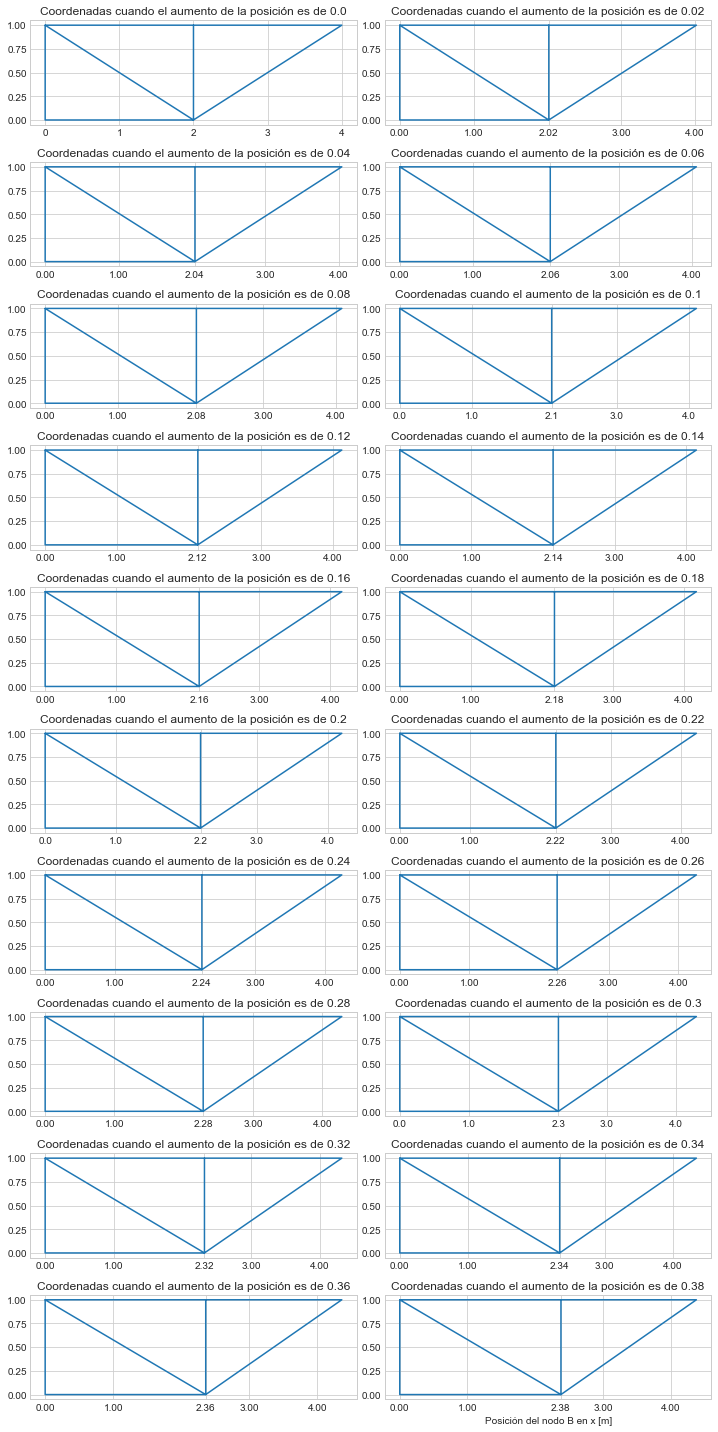

In [26]:
# CUARTO PUNTO
variaciones_distancia = np.arange(2, 2.02 + 19 * 0.02, 0.02)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(nrows=10, ncols=2)


distancia_AD = 1
distancia_BC = 2
for distancia_AB, ax in zip(variaciones_distancia, np.array(axes).flatten()):
    distancia_AC = distancia_AB + distancia_BC
    coordenadas_x = np.array([
        0, distancia_AB, distancia_AC, distancia_AB, 0, 0, distancia_AB, distancia_AB
    ])
    coordenadas_Y = np.array([
        distancia_AD, distancia_AD, distancia_AD, 0, 0, distancia_AD, 0, distancia_AD
    ])
    ax.plot(coordenadas_x, coordenadas_Y)
    ax.set_xticks([distancia_AB])
    ax.set_xticks([0, 1, distancia_AB, 3, 4])
    ax.set_title(f'Coordenadas cuando el aumento de la posición es de {round(distancia_AB - 2, 3)}')
ax.set_xlabel('Posición del nodo B en x [m]')
plt.tight_layout()
plt.show

In [81]:
# QUINTO PUNTO
variaciones_distancia = np.arange(2.02, 2.02 + 19 * 0.02, 0.02)
fuerzas_elemento_AB = np.array([])
fuerzas_elemento_AE= np.array([])
fuerzas_elemento_AD = np.array([])
fuerzas_elemento_BC = np.array([])
fuerzas_elemento_BE = np.array([])
fuerzas_elemento_CE = np.array([])
fuerzas_elemento_ED = np.array([])
counter = 0

for distancia_AB in variaciones_distancia:
    carga = 21.25
    angulo = 50
    distancia_AC = distancia_AB + distancia_BC
    angulo_barra_inclinada_AE = np.arctan(distancia_AD / distancia_AB)
    Ax, Ay, Dx = calcular_reacciones(carga, angulo, distancia_AC)
    CE, BC = obtener_fuerzas_nodo_C(carga, angulo)
    BA, BE = obtener_fuerzas_nodo_B(BC)
    EA, ED = obtener_fuerzas_nodo_E(CE, angulo_barra_inclinada_AE)
    DE, DA = obtener_fuerzas_nodo_D(Dx)
    AE, AB = obtener_fuerzas_nodo_A(Ax, Ay, angulo_barra_inclinada_AE)
    fuerzas_elemento_AB = np.append(fuerzas_elemento_AB, BA)
    fuerzas_elemento_AE = np.append(fuerzas_elemento_AE, EA)
    fuerzas_elemento_AD = np.append(fuerzas_elemento_AD, DA)
    fuerzas_elemento_BC = np.append(fuerzas_elemento_BC, BC)
    fuerzas_elemento_BE = np.append(fuerzas_elemento_BE, BE)
    fuerzas_elemento_CE = np.append(fuerzas_elemento_CE, CE)
    fuerzas_elemento_ED = np.append(fuerzas_elemento_ED, ED)
    if counter == 5:
        print(f"Reacciones angulo {angulo} grados: ")
        print(Ax, Ay, Dx)
        print("Fuerzas internas:")
        print(BA, EA, DA, BC, BE, CE, ED)
    counter += 1
  

Reacciones angulo 50 grados: 
39.99761081177824 -13.659236705838962 -56.27605522805652
Fuerzas internas:
-11.040028995399641 -32.017437312164745 0 -11.040028995399641 0 30.542981795016217 56.27605522805653


<function matplotlib.pyplot.show(close=None, block=None)>

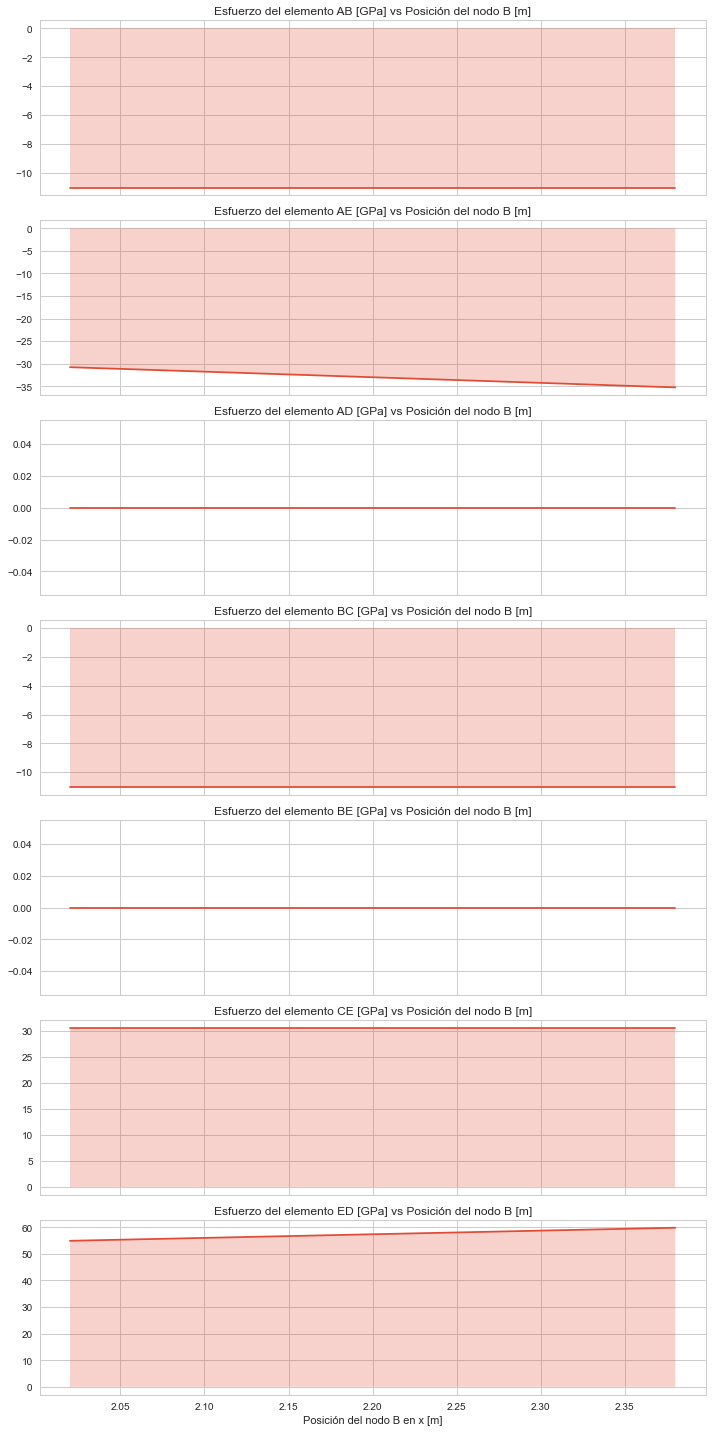

In [87]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)
plt.style.use('seaborn-whitegrid')
fuerzas_elementos = [
    (fuerzas_elemento_AB, "AB"),
    (fuerzas_elemento_AE, "AE"),
    (fuerzas_elemento_AD, "AD"),
    (fuerzas_elemento_BC, "BC"),
    (fuerzas_elemento_BE, "BE"),
    (fuerzas_elemento_CE, "CE"),
    (fuerzas_elemento_ED, "ED")
]
fig, axes = plt.subplots(nrows=7, ncols=1, sharex=True)



for fuerzas, ax in zip(fuerzas_elementos, axes):
    ax.plot(variaciones_distancia, fuerzas[0])
    ax.fill_between(variaciones_distancia, fuerzas[0], alpha=0.25)
    ax.set_title(f'Esfuerzo del elemento {fuerzas[1]} [GPa] vs Posición del nodo B [m]')
ax.set_xlabel('Posición del nodo B en x [m]')
plt.tight_layout()
plt.show